In [1]:
import os
import rasterio
import shutil
import matplotlib.pyplot as plt

from paths import source_folder, destination_folder


##### Data Source
The data was taken from Kaggle:  
[Deforestation in Ukraine from Sentinel2 data](https://www.kaggle.com/datasets/isaienkov/deforestation-in-ukraine)

Each folder in this dataset specifies a single Sentinel2 satellite image.

RGB image has "TCI" in its name and placed in location like this: S2A_MSIL1C_20160212T084052_N0201_R064_T36UYA_20160212T084510.SAFE/GRANULE/L1C_T36UYA_A003350_20160212T084510/IMG_DATA/

In [10]:
# Counter for the number of copied files
file_count = 0

# Walk through all directories and files in the source folder
for root, dirs, files in os.walk(source_folder):
    for filename in files:
        source_path = os.path.join(root, filename)
        destination_path = os.path.join(destination_folder, filename)

        # Check for files ending with '_TCI.jp2'
        if filename.lower().endswith('_tci.jp2'):
            # Print the name of the matched file
            file_name = os.path.basename(source_path)
            print(f"File matched: {file_name}")
            try:
                # Open the file to ensure it can be read
                with rasterio.open(source_path) as src:
                    data = src.read()  # Read image data
                    profile = src.profile  # Save metadata

                # Copy the file to the destination folder
                shutil.copy2(source_path, destination_path)
                print(f"Copied to: {destination_path}")
                file_count += 1
            except Exception as e:
                print(f"Error processing file {source_path}: {e}")

print(f"Images successfully processed and copied. Total count: {file_count}")


File matched: T36UYA_20160212T084052_TCI.jp2
Copied to: \\?\C:\Users\Anastasiia\Desktop\Untitled Folder\Computer vision. Sentinel-2 image matching\processed_data\T36UYA_20160212T084052_TCI.jp2
File matched: T36UYA_20160330T082542_TCI.jp2
Copied to: \\?\C:\Users\Anastasiia\Desktop\Untitled Folder\Computer vision. Sentinel-2 image matching\processed_data\T36UYA_20160330T082542_TCI.jp2
File matched: T36UYA_20160405T085012_TCI.jp2
Copied to: \\?\C:\Users\Anastasiia\Desktop\Untitled Folder\Computer vision. Sentinel-2 image matching\processed_data\T36UYA_20160405T085012_TCI.jp2
File matched: T36UYA_20160502T083602_TCI.jp2
Copied to: \\?\C:\Users\Anastasiia\Desktop\Untitled Folder\Computer vision. Sentinel-2 image matching\processed_data\T36UYA_20160502T083602_TCI.jp2
File matched: T36UYA_20160509T082612_TCI.jp2
Copied to: \\?\C:\Users\Anastasiia\Desktop\Untitled Folder\Computer vision. Sentinel-2 image matching\processed_data\T36UYA_20160509T082612_TCI.jp2
File matched: T36UYA_20160618T08260

Copied to: \\?\C:\Users\Anastasiia\Desktop\Untitled Folder\Computer vision. Sentinel-2 image matching\processed_data\T36UYA_20190611T083609_TCI.jp2
File matched: T36UYA_20190621T083609_TCI.jp2
Copied to: \\?\C:\Users\Anastasiia\Desktop\Untitled Folder\Computer vision. Sentinel-2 image matching\processed_data\T36UYA_20190621T083609_TCI.jp2
File matched: T36UYA_20190701T083609_TCI.jp2
Copied to: \\?\C:\Users\Anastasiia\Desktop\Untitled Folder\Computer vision. Sentinel-2 image matching\processed_data\T36UYA_20190701T083609_TCI.jp2
File matched: T36UYA_20190721T083609_TCI.jp2
Copied to: \\?\C:\Users\Anastasiia\Desktop\Untitled Folder\Computer vision. Sentinel-2 image matching\processed_data\T36UYA_20190721T083609_TCI.jp2
File matched: T36UYA_20190810T083609_TCI.jp2
Copied to: \\?\C:\Users\Anastasiia\Desktop\Untitled Folder\Computer vision. Sentinel-2 image matching\processed_data\T36UYA_20190810T083609_TCI.jp2
File matched: T36UYA_20190830T083609_TCI.jp2
Copied to: \\?\C:\Users\Anastasiia\

- This script processes files in a source folder, identifies those ending with '_TCI.jp2', verifies their readability using the rasterio library, and copies them to a destination folder. 
- It also tracks and prints the number of successfully copied files.

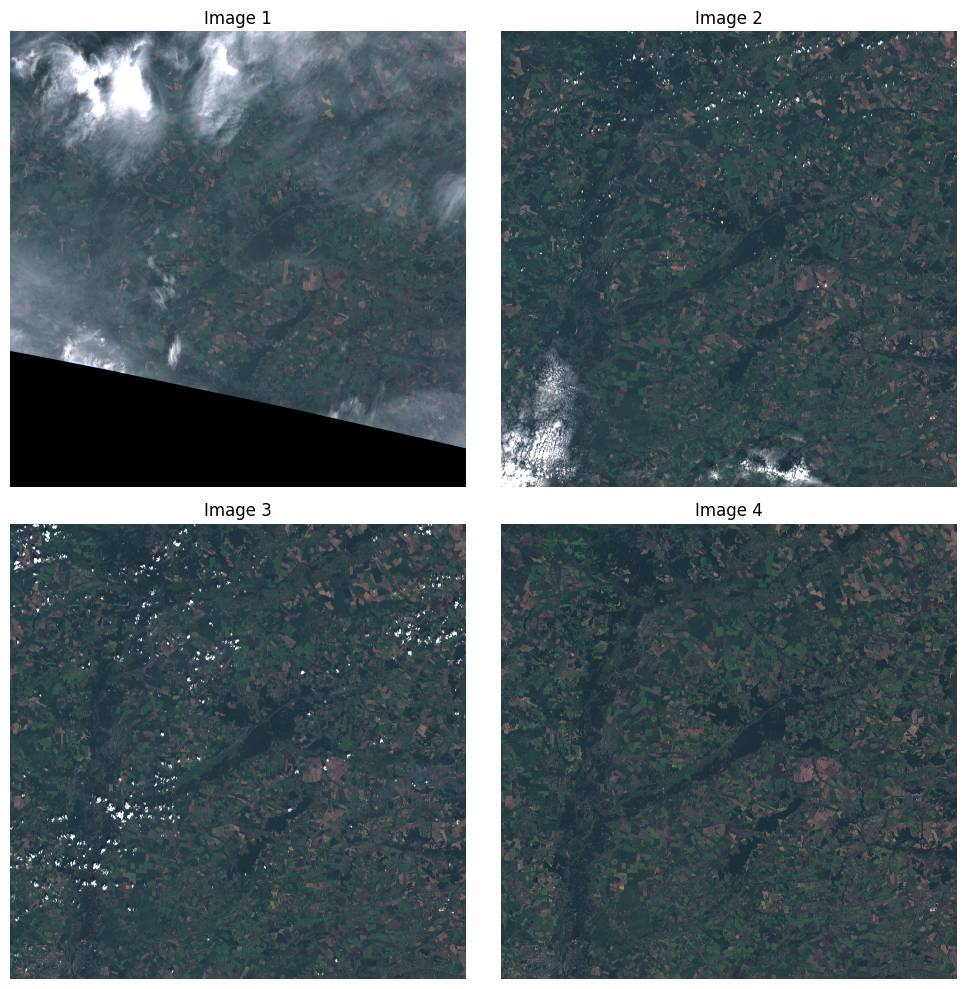

In [13]:
# List all files in the folder
files = os.listdir(destination_folder)  # Do not sort files

# Display the first 4 images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(files) and files[i].lower().endswith('.jp2'):  # Ensure the file is a JP2 image
        file_path = os.path.join(destination_folder, files[i])
        try:
            with rasterio.open(file_path) as src:
                data = src.read()  # Read the image data
                
                # Display the RGB image (assumes at least 3 bands)
                if data.shape[0] >= 3:
                    ax.imshow(data[:3].transpose(1, 2, 0))  # Transpose for RGB display
                    ax.set_title(f"Image {i + 1}")
                else:
                    ax.set_title(f"Image {i + 1}: Insufficient Bands")
                ax.axis('off')  # Remove axes
        except Exception as e:
            ax.set_title(f"Error with Image {i + 1}")
            print(f"Error reading file {file_path}: {e}")
    else:
        ax.axis('off')  # Hide unused axes

plt.tight_layout()
plt.show()